In [1]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
from shapely import wkt
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt

### Самые популярные районы
1. Проведите кластерный анализ точек сбора и высадки на основе их
координат. Кластеры могут отличаться для каждой из категорий (точки сбора и высадки).
2. Нарисуйте границы и центроиды кластеров на карте. У вас будет две карты.
3. Используйте цветовую шкалу, чтобы показать, какие кластеры (т. е. области) имеют наибольшее количество точек выбора и отсева.

In [27]:
%%time
df = pd.read_csv('data/taxi_locations.csv')
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'])

Wall time: 14 s


In [28]:
%%time
gdf = gpd.GeoDataFrame(df)
gdf.set_index('Trip ID', inplace=True)

Wall time: 114 ms


In [29]:
%%time
gdf['Pickup Centroid Location'] = gdf['Pickup Centroid Location'].apply(wkt.loads)
gdf['Dropoff Centroid  Location'] = gdf['Dropoff Centroid  Location'].apply(wkt.loads)

Wall time: 1min 38s


In [30]:
chicago = gpd.read_file("data/chicago_map.shp")

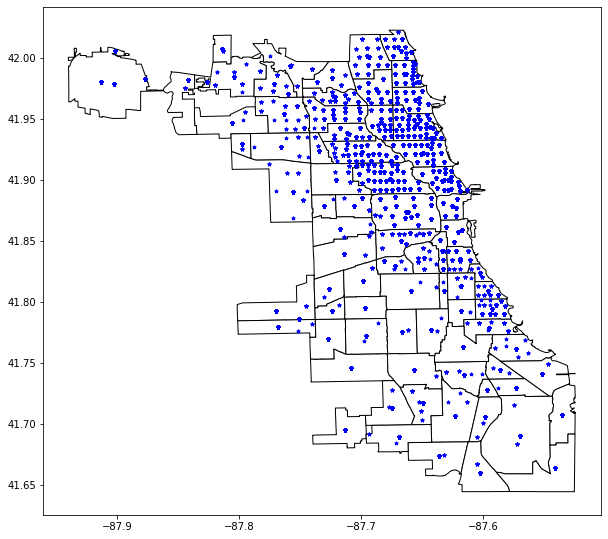

In [31]:
gs = gpd.GeoSeries(gdf['Dropoff Centroid  Location'])
ax = chicago.plot(figsize=(10,10), color='white', edgecolor='black')
gs.plot(ax=ax, marker='*', color='blue', markersize=12, figsize=(10, 10))
plt.show()

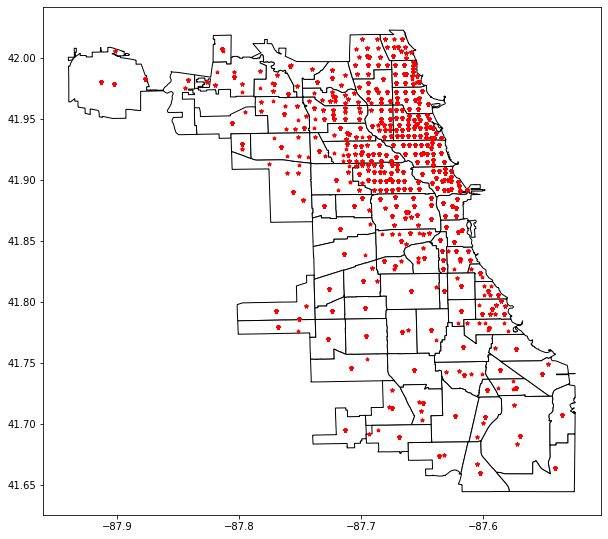

In [24]:
gs = gpd.GeoSeries(gdf['Pickup Centroid Location'])
ax = chicago.plot(figsize=(10,10), color='white', edgecolor='black')
gs.plot(ax=ax, marker='*', color='red', markersize=12, figsize=(10, 10))
plt.show()

In [ ]:
gdf.apply(lambda row: row['Pickup Centroid Location'].distance(row['Dropoff Centroid  Location']), axis=1)

In [ ]:
gdf['Taxi ID'].duplicated().any()

In [ ]:
pickup = gdf.groupby(['Pickup Centroid Location'])['Trip ID'].count().reset_index().sort_values('Trip ID', ascending=False)
pickup.head()

In [ ]:
dropoff = df.groupby(['Dropoff Centroid  Location'])['Trip ID'].count().reset_index().sort_values('Trip ID', ascending=False)
dropoff.head()

In [ ]:
gdf["area"] = gdf.area
gdf['centroid'] = gdf.centroid

In [ ]:
gdf.plot("area", legend=True)

In [ ]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

In [ ]:
gdf = gpd.read_file('data/chicago_map.shx')

### Самые популярные маршруты
1. Проведите кластерный анализ поездок на такси на основе координат места посадки и высадки.
2. Нарисуйте центроиды 5 самых популярных кластеров (маршрутов).
3. Нарисуйте маршруты между центроидами кластера – не прямую линию из точки А в точку В, а путь, учитывающий городские улицы.

In [ ]:
trip = df.groupby(['Pickup Centroid Location', 'Dropoff Centroid  Location'])['Trip ID'].count().reset_index().sort_values('Trip ID', ascending=False)
trip.head()

### Городская инфраструктура
1. Найдите местоположения городской инфраструктуры (аэропорты, стадионы, парки, университеты), используя полученные данные, и составьте свой собственный алгоритм их поиска. Найти хотя бы 6 такого рода мест.
2. Найдите час пик для каждого из местоположений – отметку времени, когда в местоположении было наибольшее количество выпадений, и сохраните информацию в этом файле : "rush_hours_empty.csv" (во вложении).
3. Визуализируйте один день любого из мест, включая этот час пик, показывая, как люди из разных мест приезжали в это место, а затем покидали его на анимированной карте.
4. Когда поездка закончится, она должна исчезнуть на карте. Другими словами, это должно выглядеть как запуск нейронов в мозге.
5. На карте должно отображаться время.

### Один день таксиста
1. Для водителя такси с идентификатором (2ea4ad2950f3bbdfdcfa7adb48e0dcee49d8a714b7024342f0302
eeb9e891dfd55a6f35bb7bc7af06398fb4f55583e1659cb11b432848296bfd2b7d3084e7de1) визуализируйте его или ее поездки в течение дня (2019-05-31). Отображение текущей суммы заработанных денег.
2. Когда поездка закончится, она не должна исчезнуть на анимированной карте.
3. Каждый раз, когда поездка заканчивается, счетчик денег должен обновляться.
4. На карте должно отображаться время.

In [ ]:
df['Trip Start Timestamp'].dt.date[0]

In [ ]:
taxi_id = '2ea4ad2950f3bbdfdcfa7adb48e0dcee49d8a714b7024342f0302eeb9e891dfd55a6f35bb7bc7af06398fb4f55583e1659cb11b432848296bfd2b7d3084e7de1'
taxi = df[(df['Taxi ID'] == taxi_id) & (df['Trip Start Timestamp'].dt.date == datetime(2019, 5, 31).date()) & (df['Trip End Timestamp'].dt.date == datetime(2019, 5, 31).date())]
taxi = taxi.sort_values(['Trip Start Timestamp'])
taxi.head()

### Один день в городе
1. Визуализируйте все поездки в городе в течение дня (2019-05-16) на анимированной карте.
2. Когда поездка закончится, она должна исчезнуть на карте. Другими словами, это должно выглядеть как запуск нейронов в мозге.
3. На карте должно отображаться время.
d. Представление
Ваш репозиторий должен содержать одну или несколько записных книжек с вашими решениями и
визуализациями.
Также в нем должен содержаться файл с часами пик для объектов городской инфраструктуры.
Это будет сопоставлено с нашим досье. Мы рассчитаем пересечение вашего набора с нашим набором местоположений и часов пик. Пересечение должно содержать не менее 3 элементов. Столбцы, которые будут приняты во внимание: долгота, широта, num_of_rides, Отметка времени окончания поездки.

### Бонусная часть
• Создайте визуализацию в виде веб-сайта с интерактивными элементами (например, где вы можете выбрать дату или идентификатор водителя, выбрать местоположение и т. Д.).
• Постарайтесь добиться лучшего результата с пересечением – не менее 5 элементов.